In [1]:
import pandas as pd
import numpy as np
import emoji
import nltk

In [5]:
import pickle
import json
import re

In [6]:
filename = "/Users/imac/Documents/Tweets data/Trump_tweets.pkl"
filename2 = "/Users/alexkowalski/Documents/Biden_tweets.pkl"

In [7]:
with open(filename2, 'rb') as f:
    data = pickle.load(f)

In [8]:
#data

In [92]:
full_text = []

with open(filename2, "rb") as file:
    while True:
        try:
            tweet = pickle.load(file)
            #full_text.append(tweet['full_text'])
            full_text.append(tweet)
            #print(tweet.keys())
        except EOFError:
            break

In [10]:
len(full_text)

76868

In [11]:
type(full_text)

list

In [12]:
with open("sample.json", "w") as outfile: 
    json.dump(full_text, outfile)

In [93]:
df_biden = pd.DataFrame(full_text)

In [94]:
df_biden

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_in_countries
0,Thu Oct 22 23:59:59 +0000 2020,1319428320233140224,1319428320233140224,RT @bennyjohnson: 🚨 BOMBSHELL🚨 \n\nVeteran &am...,False,"[0, 147]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Oct 22 23:59:59 +0000 2020,1319428320140926978,1319428320140926978,RT @realDonaldTrump: Finally! Suburban women a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 22 23:59:59 +0000 2020,1319428320077901824,1319428320077901824,RT @MaajidNawaz: BREAKING:\nUS Navy veteran Lt...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,Thu Oct 22 23:59:59 +0000 2020,1319428319809593346,1319428319809593346,RT @JonahDispatch: Lara Trump has said three t...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Oct 22 23:59:59 +0000 2020,1319428319587102720,1319428319587102720,RT @cenkuygur: Why is no journalist asking why...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76863,Mon Dec 14 23:56:27 +0000 2020,1338633986310955009,1338633986310955009,RT @funder: California (55) affirms Biden’s wi...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76864,Mon Dec 14 23:56:27 +0000 2020,1338633986197819394,1338633986197819394,RT @voxdotcom: Trump's “alternate slate of ele...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76865,Mon Dec 14 23:56:27 +0000 2020,1338633986185322497,1338633986185322497,@JoeBiden @DrBiden @KamalaHarris @DouglasEmhof...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76866,Mon Dec 14 23:56:27 +0000 2020,1338633986097164288,1338633986097164288,President- elect Joe Biden. It feels good and ...,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,5,False,False,en,False,1.338612e+18,1338612046896771072,{'created_at': 'Mon Dec 14 22:29:16 +0000 2020...,NaN,NaN


In [ ]:
#Converting the list to a data frame for further analysis

In [66]:
trump_df = pd.DataFrame (full_text,columns=['tweet'])

In [67]:
trump_df

,tweet
0,"RT @ThomboyD: Ok, how many warnings does trump..."
1,RT @JonahDispatch: Lara Trump has said three t...
2,RT @jburnmurdoch: I particularly love this won...
3,RT @AliVelshi: BREAKING: A federal judge in NJ...
4,RT @RepsForBiden: Let’s make sure Trump is bei...
...,...
118225,RT @mkraju: Trump’s Hill allies blindsided by ...
118226,RT @CNNPolitics: JUST IN: The Electoral Colleg...
118227,RT @CNBCnow: BREAKING: President-elect Joe Bid...
118228,@RomanSaluter @TitusNation The crowd is cheeri...


In [17]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/alexkowalski/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [95]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

In [96]:
df_biden['full_text'] = df_biden['full_text'].map(lambda x: cleaner(x))

In [97]:
df_biden

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_in_countries
0,Thu Oct 22 23:59:59 +0000 2020,1319428320233140224,1319428320233140224,: 🚨 BOMBSHELL 🚨 Veteran & ; business partner o...,False,"[0, 147]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Oct 22 23:59:59 +0000 2020,1319428320140926978,1319428320140926978,: Finally ! Suburban are flocking over to us ....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 22 23:59:59 +0000 2020,1319428320077901824,1319428320077901824,": BREAKING : US Navy veteran Tony ,, ’ s forme...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,Thu Oct 22 23:59:59 +0000 2020,1319428319809593346,1319428319809593346,: Trump said three times during an interview o...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Oct 22 23:59:59 +0000 2020,1319428319587102720,1319428319587102720,: Why is no journalist why team ' t used at al...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76863,Mon Dec 14 23:56:27 +0000 2020,1338633986310955009,1338633986310955009,: ( 55 ) ’ s win . ’ s total is now 302 . It ’...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76864,Mon Dec 14 23:56:27 +0000 2020,1338633986197819394,1338633986197819394,: Trump ' s “ alternate slate of ” have no leg...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76865,Mon Dec 14 23:56:27 +0000 2020,1338633986185322497,1338633986185322497,"PRESIDENT AND MADAM VICE PRESIDENT , , and esp...",False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
76866,Mon Dec 14 23:56:27 +0000 2020,1338633986097164288,1338633986097164288,President - elect Joe . It good and right .,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,5,False,False,en,False,1.338612e+18,1338612046896771072,{'created_at': 'Mon Dec 14 22:29:16 +0000 2020...,NaN,NaN


In [58]:
# word cloud for Trump

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [26]:
mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df_biden.full_text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

There are 7076830 words in the combination of all tweets.


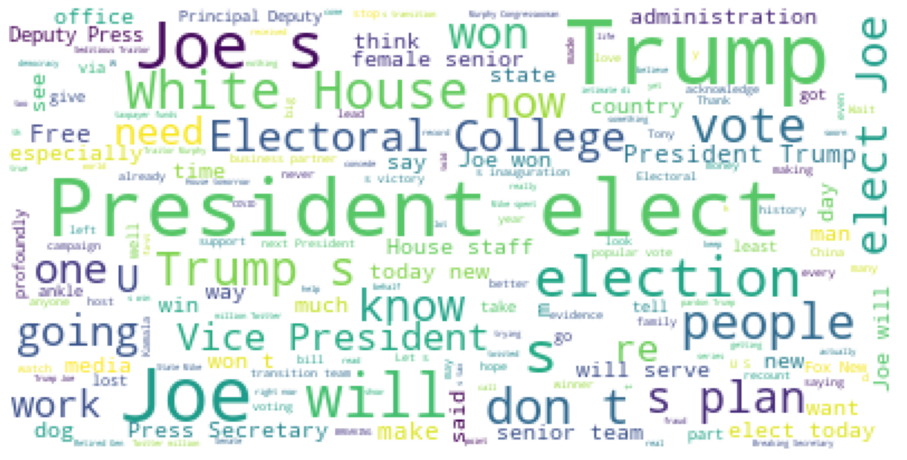

In [27]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

In [ ]:
# Most popular words for Trump

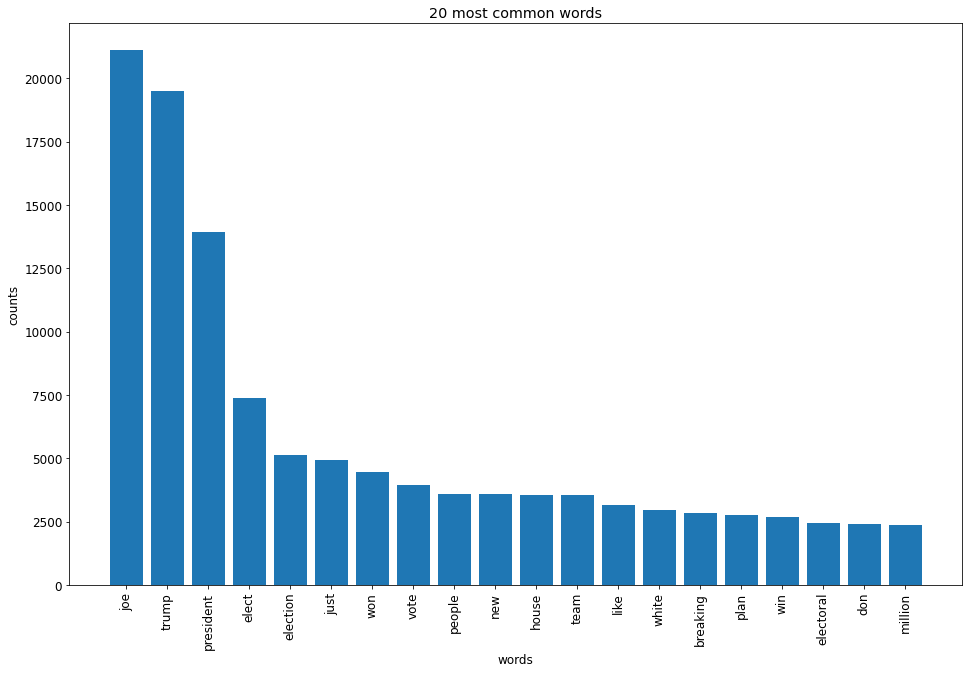

In [31]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_biden['full_text'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [33]:
# group and separate tweets by date

In [160]:
new_df = []
#new_df = df_biden


#df_biden.created_at[0][4:10]
#new_df

for item in df_biden.created_at:
    new_df.append(item[4:10])
    
replaced = []

for item in new_df:
    replaced_val = item.replace("Oct", "10")
    replaced_val = item.replace("Nov", "11")
    replaced_val = item.replace("Dec", "12")
    replaced.append(replaced_val) 
    
    
#for num, name in enumerate(new_df, start = 0):
#   print(new_df[num].replace("Oct", "10"))
    #new_df.append(new_df[num].replace("Oct", "10"))

In [164]:
#new_df
#replaced

In [176]:
new_df = df_biden

for i in range(len(new_df.created_at)):
    #new_df.created_at[i] = new_df.created_at[i].replace("Oct", "10")
    #new_df.created_at[i] = new_df.created_at[i].replace("Nov", "11")
    #new_df.created_at[i] = new_df.created_at[i].replace("Dec", "12")
    new_df.created_at[i] = new_df.created_at[i][4:10]

<ipython-input-176-9d9b55d3bce1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.created_at[i] = new_df.created_at[i][4:10]


In [181]:
new_df.created_at.unique()
len(new_df.created_at.unique())

8

In [183]:
# The approach of "cleaning" the dates:

In [159]:
df_biden.created_at[0]

'Thu Oct 22 23:59:59 +0000 2020'

In [128]:
new = df_biden.created_at[0][4:10]
new

'Oct 22'

In [64]:
for item in df_biden.created_at:
    item = item.replace("Oct", "10")
    item = item.replace("Nov", "11")
    item = item.replace("Dec", "12")

In [75]:
#for item in df_biden.created_at:
#    print(item)

In [110]:
df_biden.created_at.unique()

array(['Thu Oct 22 23:59:59 +0000 2020', 'Thu Oct 22 23:59:58 +0000 2020',
       'Thu Oct 22 23:59:57 +0000 2020', ...,
       'Mon Dec 14 23:56:29 +0000 2020', 'Mon Dec 14 23:56:28 +0000 2020',
       'Mon Dec 14 23:56:27 +0000 2020'], dtype=object)

In [52]:
from datetime import datetime

In [54]:
datetime.now()

datetime.datetime(2021, 5, 4, 10, 19, 37, 379982)

In [61]:
df_biden.created_at

0        Thu Oct 22 23:59:59 +0000 2020
1        Thu Oct 22 23:59:59 +0000 2020
2        Thu Oct 22 23:59:59 +0000 2020
3        Thu Oct 22 23:59:59 +0000 2020
4        Thu Oct 22 23:59:59 +0000 2020
                      ...              
76863    Mon Dec 14 23:56:27 +0000 2020
76864    Mon Dec 14 23:56:27 +0000 2020
76865    Mon Dec 14 23:56:27 +0000 2020
76866    Mon Dec 14 23:56:27 +0000 2020
76867    Mon Dec 14 23:56:27 +0000 2020
Name: created_at, Length: 76868, dtype: object

In [51]:
#compression_opts = dict(method='zip', archive_name='biden_cleaned.csv')

In [36]:
#df_biden.to_csv('biden_cleaned.zip', index=False, compression=compression_opts)  

In [37]:
#df_biden

In [42]:
df_biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76868 entries, 0 to 76867
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 76868 non-null  object 
 1   id                         76868 non-null  int64  
 2   id_str                     76868 non-null  object 
 3   full_text                  76868 non-null  object 
 4   truncated                  76868 non-null  bool   
 5   display_text_range         76868 non-null  object 
 6   entities                   76868 non-null  object 
 7   metadata                   76868 non-null  object 
 8   source                     76868 non-null  object 
 9   in_reply_to_status_id      11542 non-null  float64
 10  in_reply_to_status_id_str  11542 non-null  object 
 11  in_reply_to_user_id        12024 non-null  float64
 12  in_reply_to_user_id_str    12024 non-null  object 
 13  in_reply_to_screen_name    12024 non-null  obj

In [123]:
fav_max = np.max(df_biden['favorite_count'])
rt_max  = np.max(df_biden['retweet_count'])

fav = df_biden[df_biden.favorite_count == fav_max].index[0]
rt  = df_biden[df_biden.retweet_count == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(df_biden['full_text'][fav]))
print("Number of likes: {}".format(fav_max))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(df_biden['full_text'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with more likes is: 
So who to tell the media that there ' s officially more on the record evidence that was part of ' s international business in China , and more than there ever was that " with Russia ?" Total !!!
Number of likes: 27815
The tweet with more retweets is: 
: I ’ m Joe and I approve this message .
Number of retweets: 270723


In [124]:
# Sentiment analysis

In [28]:
from textblob import TextBlob

In [29]:
def sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [30]:
df_biden['SA'] = np.array([ sentiment(tweet) for tweet in df_biden['full_text'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df_biden['full_text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df_biden['full_text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df_biden['full_text'])))

sa =[pos_tweets,neu_tweets,neg_tweets]

Percentage of positive tweets: 46.715148046000934%
Percentage of neutral tweets: 38.675391580371546%
Percentage de negative tweets: 14.609460373627517%


In [132]:
# Sentiment Analysis by Vader

In [133]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based 
# sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
# It is fully open-sourced under the [MIT License]

In [134]:
#Vader Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [135]:
sentiment = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = sentiment.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [136]:
df_biden['VSA'] = np.array([ sentiment_analyzer_scores(tweet) for tweet in df_biden['full_text'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['VSA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['VSA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df_biden['full_text']) if df_biden['VSA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df_biden['full_text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df_biden['full_text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df_biden['full_text'])))

Percentage of positive tweets: 39.733048862985896%
Percentage of neutral tweets: 37.531872820939796%
Percentage de negative tweets: 22.735078316074308%


In [137]:
# SA — Sentiment Analysis Score from Textblob
# VSA — Sentiment Analysis Score from Vader